In [180]:
import pandas as pd 
import numpy as np 
import math

To be able to calculate two points between two coorrdinates The Haversine formula can be used. 

**The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes. Important in navigation, it is a special case of a more general formula in spherical trigonometry, the law of haversines, that relates the sides and angles of spherical triangles.**

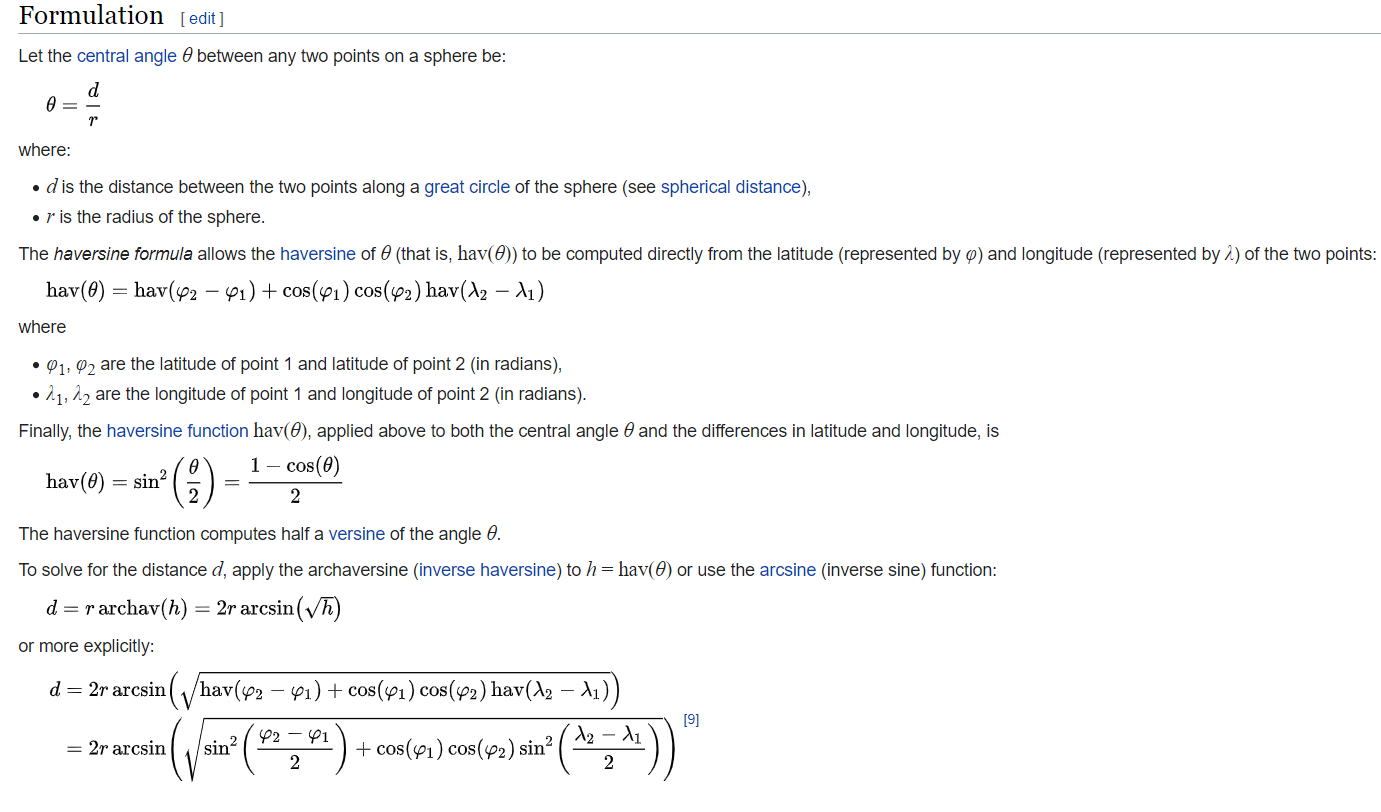

In [ ]:
def haversine(coord1: object, coord2: object):
    
    lon1, lat1 = coord1
    lon2, lat2 = coord2

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    km = meters / 1000.0  # output distance in kilometers
    km = round(km, 3)

    print(f"Distance: {km} km")

The function above  can be used or a module can be downloaded which has few additioanal attributes. 

In [1]:
pip install haversine 

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from haversine import haversine, Unit

In [201]:

def coord(id):
    lat=df[df.id==id]['latitude']
    lon=df[df.id==id]['longitude']
    
    return (lat,lon)

def find_n_nearest(hotel_id,n_nearest_hotel):

    distances=[(haversine(all_coord[hotel_id], all_coord[i]),i) for i in df.id if i != hotel_id and i <48895]

    distances.sort( reverse=False)

    return distances[:n_nearest_hotel]


Let's try the code on a Airbnb data set for New York City.

In [202]:
df=pd.read_csv('C:\\Users\\FURKAN\\Desktop\\codes\\AB_NYC_2019.csv')

In [198]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [203]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [204]:
hotel_id=2539
n_nearest_hotel=5

find_n_nearest(hotel_id,n_nearest)

[(0.4129695126538536, 46723),
 (0.6052112345997662, 26520),
 (0.8492963634343483, 15385),
 (0.9629717082171338, 25235),
 (1.1205004123839346, 44506)]

Calculated distances can be visualized easily with folium library. 

In [205]:
pip install folium

In [223]:
import folium
from branca.element import Figure

def create_map(hotel_id,n_nearest_hotel):

    fig=Figure(width=550,height=350)

    fig=Figure(width=750,height=650)
    map_nearest=folium.Map(location=coord(hotel_id))
    folium.Marker(location=coord(hotel_id),tooltip='Hotel',icon=folium.Icon(color="red", icon="info-sign")).add_to(map_nearest)

    for i in range(0,n_nearest_hotel):

        folium.Marker(location=coord(distances[i][1]),tooltip='Distance: ' + str(distances[i][0])[:4] + ' '+'km').add_to(map_nearest)

    return map_nearest



In [224]:
create_map(hotel_id,n_nearest_hotel)

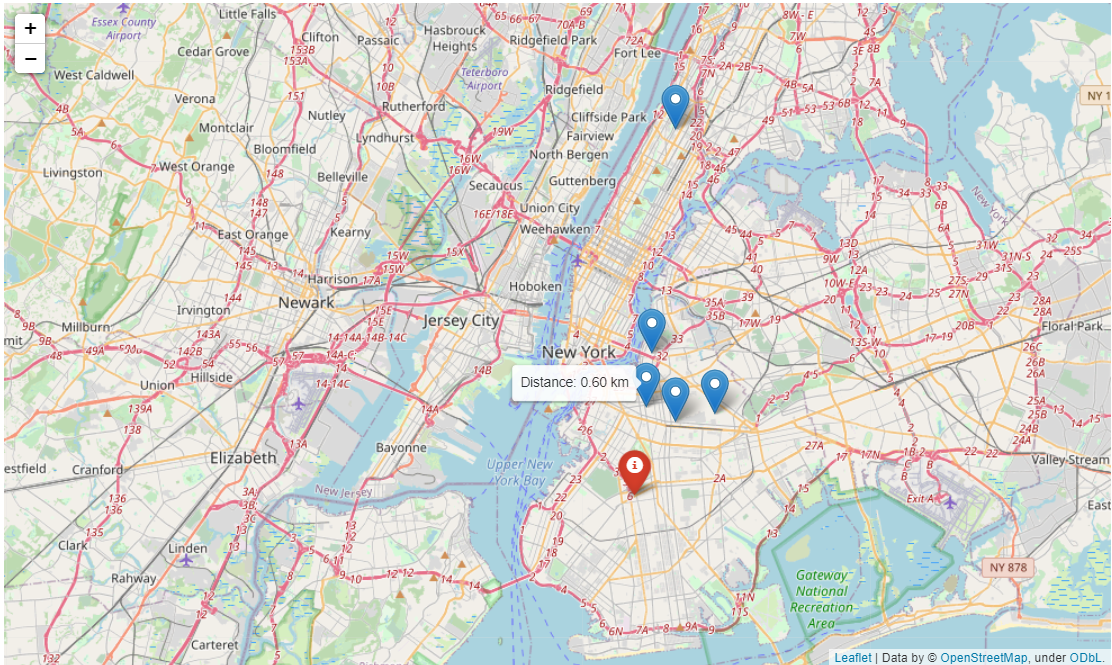